Advanced Topics and Plans
====================================

Capabilities not yet covered
-----------------------------------------

This is tentative since it depends on the content of the previous sections. I'll be over-inclusive.
Depending, some may have brief executable examples, but not yet.

- Handling in-line vs binary array choices
  - E.g., files editable with a text editor
  - Easily printed out
  - Enables scientists to use own code to read contents without ASDF libraries
- Serializing analytic models without pickle


Serializing Models
---------------------------

Uses astropy models

In [ ]:
import os
import astropy.modeling.models as amm
import numpy as np
import asdf
from matplotlib import pyplot as plt

Create a simple model and plot
----------------------------------------------

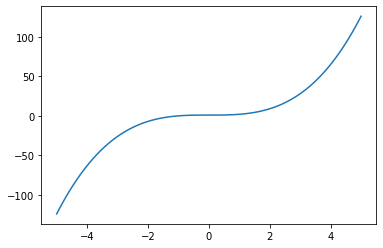

In [24]:
poly_model = amm.Polynomial1D(degree=3, c0=1.0, c3=1.0)
poly_model.coeff = (1.0, 0.0, 0.0, 1.0)
x = np.linspace(-5, 5, 101)
plt.plot(x, poly_model(x))

In [9]:
af = asdf.AsdfFile()
af.tree = {"model": poly_model}
af.write_to("model.asdf")
af2 = asdf.open("model.asdf")
poly_model2 = af2.tree["model"]
print(poly_model2(x) - poly_model(x))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


Compound model example
----------------------------------------

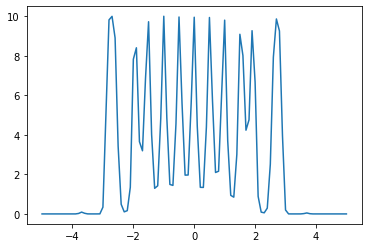

In [18]:
compound = (
    poly_model + amm.Sine1D(amplitude=20.0, frequency=1.0, phase=0.0)
) | amm.Gaussian1D(amplitude=10.0, mean=0.0, stddev=10.0)
plt.plot(x, compound(x))

In [38]:
af.tree = {"compound": compound}
af.write_to("compound.asdf", all_array_storage="inline")
with open("compound.asdf", "rb") as asdftext:
    text = asdftext.read()
    print(text.decode("utf-8"))

#ASDF 1.0.0
#ASDF_STANDARD 1.5.0
%YAML 1.1
%TAG ! tag:stsci.edu:asdf/
--- !core/asdf-1.1.0
asdf_library: !core/software-1.0.0 {author: The ASDF Developers, homepage: 'http://github.com/asdf-format/asdf',
  name: asdf, version: 2.11.2.dev15+g6703d8f.d20220607}
history:
  extensions:
  - !core/extension_metadata-1.0.0
    extension_class: asdf.extension.BuiltinExtension
    software: !core/software-1.0.0 {name: asdf, version: 2.11.2.dev15+g6703d8f.d20220607}
  - !core/extension_metadata-1.0.0
    extension_class: asdf.extension._manifest.ManifestExtension
    extension_uri: asdf://asdf-format.org/transform/extensions/transform-1.5.0
    software: !core/software-1.0.0 {name: asdf-astropy, version: 0.2.1}
compound: !transform/compose-1.2.0
  forward:
  - !transform/add-1.2.0
    forward:
    - !transform/polynomial-1.2.0
      coefficients: !core/ndarray-1.0.0
        data: [1.0, 0.0, 0.0, 1.0]
        datatype: float64
        shape: [4]
      domain: &id001 [-1, 1]
      inputs: [x]
    

Plans for Development
-------------------------------

- Clean up standard by removing astropy dependencies (required by time and units)
- Support for fsspec for cloud usage (probably based on zarr and possibly DASK)
- Support for chunking (also based on zarr, incorporate into zarr itself)
  - Improved block management
- More compression options, mostly based on BLOSC
- C/C++ support (initially through Python, but ideally as a native library)
- Schema information retrieval, e.g., get description associated with an attribute
- Support custom validators

Questions?
------------------